# **Geometric image transformations (with OpenCV)**

<div style="color:#777777;margin-top: -15px;">
<b>Author</b>: Norman Juchler |
<b>Course</b>: ADLS ISP |
<b>Version</b>: v1.2 <br><br>
<!-- Date: 03.04.2025 -->
<!-- Comments: Fully refactored. -->
<!-- TODO: Demonstrate the forward and backward transformation: iteration over the input image pixels, vs. iteration over the output image pixels... INVERSE... -->
</div>

It is a common task to move, rotate, scale or otherwise transform an image. In this tutorial, you will learn about different ways how to perform various geometric transformations programmatically in Python and OpenCV.



---

<a id='exercise1'></a>

## **☆ Exercise 1: Manually transform an image**

Use an image editing program to solve the following task. Open image A (missing.png) and image B (piece-scaled-transparent.png), and try to align the missing piece so that it fits perfectly into the gap.

### **Instructions**

* Open your favorite image editing program
* Load image A
* Insert image B
* Translate, rotate and scale image B until it aligns with the gap

Here is a list of possible editors you could use:
* Adobe Photoshop
* Adobe Illustrator
* GIMP
* Paint.NET (Win)
* Preview (MacOS)
* Microsoft Photo Editor (Win)
* Microsoft PowerPoint
* ...

(Let your tutor know if your favorite image editor is missing from the list!)


---

## **Preparations**

Before we start, let's import some packages. The package `isp` provides some helper functions to display images easily in this Jupyter notebook. (You are welcome to look into these functions if you are curious, but a deep understanding is not required.)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import PIL

# Jupyter / IPython configuration:
# Automatically reload modules when modified
%load_ext autoreload
%autoreload 2

# Enable vectorized output (for nicer plots)
%config InlineBackend.figure_formats = ["svg"]

# Inline backend configuration
%matplotlib inline

# Enable this line if you want to use the interactive widgets
# It requires the ipympl package to be installed.
#%matplotlib widget

import sys
sys.path.insert(0, "../")
import isp


---

Let's load the images and take a look at them. Note that they include an alpha channel (transparency). In this tutorial, we will preserve this extra channel, although all the operations shown below would work just as well with standard RGB images.


The **alpha channel** is an additional channel in an image that represents transparency. While an RGB image uses three channels (red, green, and blue) to define color, an RGBA image adds a fourth channel – alpha – which indicates how opaque or transparent each pixel is.

* A value of 0 means the pixel is fully transparent
* A value of 255 (or 1.0 in normalized form) means the pixel is fully opaque

This is especially useful when layering or blending images, such as in graphics, UI design, or computer vision applications.

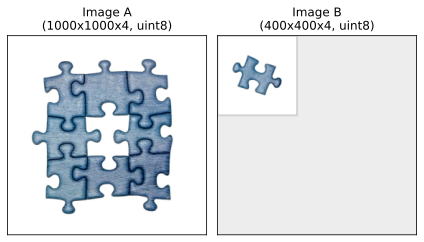

In [3]:
# Read the image (flag IMREAD_UNCHANGED preserves the alpha channel)
imageA = cv.imread(filename="../data/images/water2/missing.jpg", 
                   flags=cv.IMREAD_COLOR)
imageB = cv.imread(filename="../data/images/water2/piece-scaled.jpg", 
                   flags=cv.IMREAD_COLOR)

# Convert the image from BGRA to RGBA
imageA = cv.cvtColor(imageA, cv.COLOR_BGRA2RGBA)
imageB = cv.cvtColor(imageB, cv.COLOR_BGRA2RGBA)

# Display the images side-by-side
titleA = f"Image A"
titleB = f"Image B"
isp.show_image_pair(imageA, imageB, title1=titleA, title2=titleB)


---

<a id='exercise2'></a>

## **☆ Exercise 2: Resize an image**

Try scaling imageB by different factors and observe the results. You can use [`cv.resize()`](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) for this task.

```python
# Resize image to specific dimensions:
scaled = cv.resize(image, (new_width, new_height))
# Resize using scaling factors:
scaled = cv.resize(image, None, fx=factor_x, fy=factor_y)
```

### **Instructions**
* Trasnformation 1: Scale imageB to size (1000, 1800)
* Transformation 2: Stretch imageB by factor 2 in x-direction, and squeeze it in y-direction by factor 0.5
* Transformation 3: Scale imageB by factor 1.5, preserving the aspect ratio

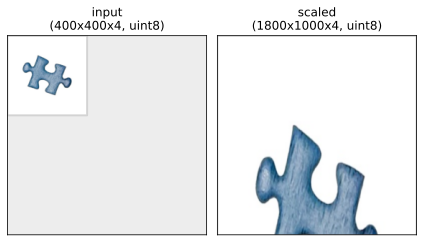

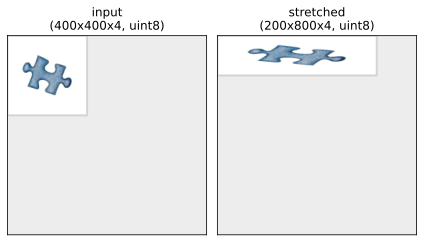

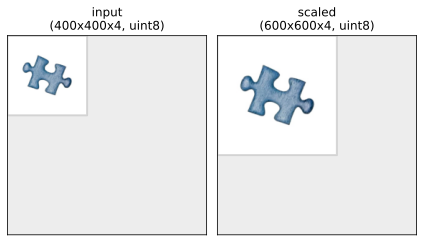

In [4]:
######################
###    EXERCISE    ###
######################

# Task 1:
scaled = cv.resize(imageB,(1000,1800))
isp.show_image_pair(imageB, scaled, title1="input", title2="scaled",shape = (1000,1000))

# Task 2:
scaled= cv.resize(imageB,None,fx = 2,fy = 0.5)
isp.show_image_pair(imageB, scaled, title1="input", title2="stretched",shape = (1000,1000))

# Task 3:
scaled = cv.resize(imageB,None,fx = 1.5,fy = 1.5)
isp.show_image_pair(imageB,scaled,title1='input',title2 = 'scaled',shape = (1000,1000) )


---

## **Affine warping with transformation matrices**

Note: To better understand this section, we recommend reading the primer on *Affine Transformations* available in our project repository.

Affine transformations can be described using matrices. In **homogeneous coordinates**, the transformation matrix takes the following form:
$$
A = \begin{pmatrix}
a_{00} & a_{01} & t_0 \\
a_{10} & a_{11} & t_1 \\
0 & 0 & 1
\end{pmatrix}
$$

Using this matrix, an affine transformation can be expressed as:

$$y = A\cdot x$$

Here, the matrix $A$ encodes all transformation parameters. The vector $x$ represents the coordinates of a pixel (in homogeneous coordinates) in the input image, and $y$ is the corresponding position in the target image. 


Image scaling is one of the simplest transformations that can be represented using such a matrix $A$. Let's try it out in OpenCV! Note that OpenCV also operates with affine transformation matrices, but it **omits the last row** of $A$, since it is always constant for affine transformations: $[0, 0, 1]$. Therefore, OpenCV uses a simplified 2×3 matrix format:


$$
A = \begin{pmatrix}
a_{00} & a_{01} & t_0 \\
a_{10} & a_{11} & t_1
\end{pmatrix}
$$

Scaling matrix:
[[2.  0.  0. ]
 [0.  0.5 0. ]]


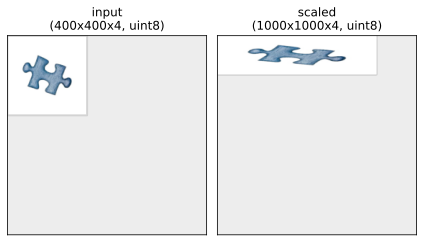

In [5]:
# Specify the scaling factors
scale_x = 2.0  # scaling factor in x-direction
scale_y = 0.5  # scaling factor in y-direction

# Define the scaling matrix
scaling_matrix = np.float32([[scale_x, 0, 0], [0, scale_y, 0]])

# Display the matrix
print(f"Scaling matrix:\n{scaling_matrix}")

# Apply the scaling
scaled = cv.warpAffine(imageB, scaling_matrix, (1000,1000))
cv.imwrite("scaled.png", cv.cvtColor(scaled, cv.COLOR_RGBA2BGRA))
cv.imwrite("imageB.png", cv.cvtColor(imageB, cv.COLOR_RGBA2BGRA))

# Display the result
isp.show_image_pair(imageB, scaled, title1="input", title2="scaled")


---

<a id='exercise3'></a>

## **☆ Exercise 3: Move an image**


### **Instructions**

* Translate `imageB` by 100 pixels in the x-direction and 250 pixel in the y-direction
* Use the function [`cv::warpAffine()`](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983)



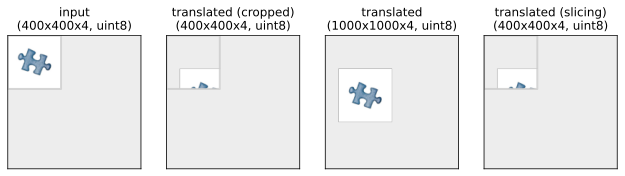

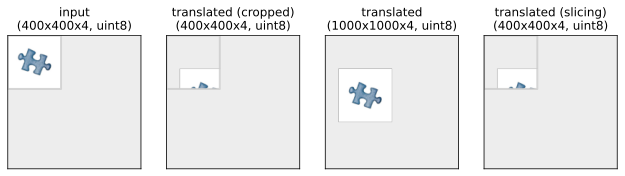

In [6]:
######################
###    EXERCISE    ###
######################

# Set the parameters here
tx = 100
ty = 250

translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

# Apply the translation
imageT1 = cv.warpAffine(imageB, translation_matrix, 
                         (imageB.shape[1], imageB.shape[0]))
# Notice how the content of imageT1 walks off the edge of the image.
# To avoid this, we can use a bigger size of the destination image.
imageT2 = cv.warpAffine(imageB, translation_matrix, 
                        (1000, 1000))

# If tx and ty are whole numbers, the following would be equivalent:
imageT3 = np.zeros_like(imageB)
imageT3[ty:, tx:] = imageB[:-ty, :-tx]

# Display the original and translated images
isp.show_image_chain(images=(imageB, imageT1, imageT2, imageT3), 
                     titles=("input", "translated (cropped)", "translated", "translated (slicing)"),
                     shape=(1000, 1000))

---

<a id='exercise4'></a>

## **☆ Exercise 4: Rotation with an arbitrary center**

A rotation is defined by two parameters: a rotation angle $\phi$ and a center of rotation $C$ (the hinge point).

OpenCV provides the function [`cv.getRotationMatrix2D(center, angle, scale)`](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326), which returns a 2×3 transformation matrix for rotating (and optionally scaling) an image around an arbitrary center point.

The resulting *transformation matrix* $A$ encodes all the information required to perform the transformation. It can be passed directly to [`cv.warpAffine(image, matrix, shape)`](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983), which applies the transformation and returns a new image with the specified `shape = (width, height)`.

⚠️ **Note:** OpenCV expects angles in *degrees*, while `numpy` functions often expect *radians* unless stated otherwise!


### **Instructions**:
1. Rotate `imageA` 70° around the center of the image  
2. Rotate `imageB` −30° around the center of the image  
3. Rotate `imageA` 30° around the top-left corner (coordinates: (0, 0))  
4. Rotate `imageB` 90° around the bottom-right corner (coordinates: (`width`, `height`))

Start with a scaling factor of 1.0, then repeat each transformation with a scaling factor of 2.0.

Explain your observations!
- In which direction does the image rotate for positive angles?
- Do you understand all the results? If not, try visualizing the hinge point and rotation direction.


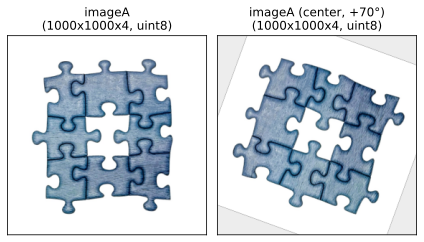

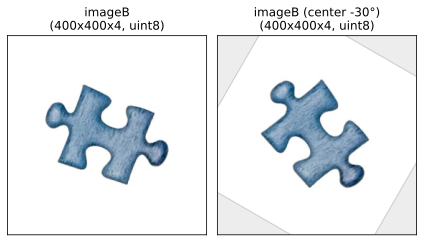

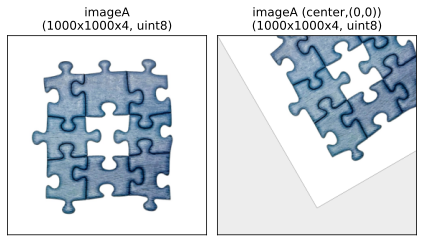

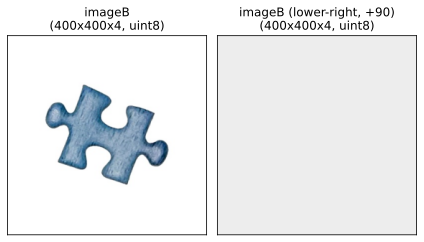

In [7]:
######################
###    EXERCISE    ###
######################




# Height and width of the two images, with shape the output is height,width and channel. with [:2] we consider the first two.
hA, wA = imageA.shape[:2]
hB, wB = imageB.shape[:2]
# Set the scaling factor here.
scale = 1.0

# Task 1: imageA, angle = 70 (counterclockwise), rotation around center
angle = 70                # in DEGREES
center = (wA//2, hA//2)   # in PIXELS, we use // because pixel are always int and not floats
# Define the rotation matrix
rotation_matrix = cv.getRotationMatrix2D(center, angle, scale)
# Apply the rotation
rotated_image = cv.warpAffine(imageA, rotation_matrix, (wA, hA))
# Visualize
isp.show_image_pair(imageA, rotated_image, title1="imageA", title2="imageA (center, +70°)")

# Task 2:
angle = -30                # in DEGREES
center = (wB//2, hB//2)   # in PIXELS, we use // because pixel are always int and not floats
# Define the rotation matrix
rotation_matrix = cv.getRotationMatrix2D(center, angle, scale)
# Apply the rotation
rotated_image = cv.warpAffine(imageB, rotation_matrix, (wB, hB))
# Visualize
isp.show_image_pair(imageB, rotated_image, title1="imageB", title2="imageB (center -30°)")

# Task 3:
angle = 30           # in DEGREES
center = (0,0)   # in PIXELS, we use // because pixel are always int and not floats
# Define the rotation matrix
rotation_matrix = cv.getRotationMatrix2D(center, angle, scale)
# Apply the rotation
rotated_image = cv.warpAffine(imageA, rotation_matrix, (wA, hA))
# Visualize
isp.show_image_pair(imageA, rotated_image, title1="imageA", title2="imageA (center,(0,0))")

# Task 4:
angle = 90               # in DEGREES
center = (wB, hB)        # in PIXELS
rotation_matrix = cv.getRotationMatrix2D(center, angle, scale)
rotated_image = cv.warpAffine(imageB, rotation_matrix, (wB, hB))
isp.show_image_pair(imageB, rotated_image, title1="imageB", title2="imageB (lower-right, +90)")

# Observations: 
# - For some settings, the rotated image will be cropped partially or even completely.
# - For a positive angle, the image is rotated counterclockwise, for a negative angle, 
#   it is rotated clockwise.
# - The scaling is applied such that the rotation center remains at the same position.
# - Unfortunate transformation parameters may lead to an empty image because the image
#   is projected outside the field of view of the target image.


---

<a id='exercise5'></a>

## **☆☆ Exercise 5: Compound transformations**

In the primer on affine transformations, we learned that multiple elementary transformations can be combined (concatenated) to form more complex transformations. The function [`cv.getRotationMatrix2D()`](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html) returns such a compound transformation matrix.

The goal of this exercise is to understand how the transformation matrix returned by `cv.getRotationMatrix2D()` is composed.

### **Instructions:**
1. Review Figure 2 in the primer on affine transformations
2. Consider: Which elementary transformations might be combined in the matrix returned by `cv.getRotationMatrix2D()`?
3. Try to construct the transformation matrix manually:
   - Use `imageB` as input
   - Choose the image center as the rotation center
   - Apply a scaling factor of 2.0 (in both x and y directions)
   - Set the rotation angle to +30°
4. Reflect: Does the order of transformation steps (scaling, rotation, translation) matter? Explain your reasoning.


Rotation matrix OpenCV:
-----------------------
[[   1.732    1.    -346.41 ]
 [  -1.       1.732   53.59 ]]

Rotation matrix manual:
-----------------------
[[   1.732    1.    -346.41 ]
 [  -1.       1.732   53.59 ]]


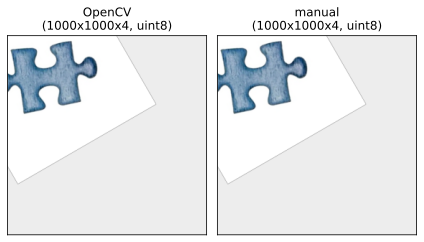

In [9]:
######################
###    EXERCISE    ###
######################

# Task 1 + 2:
#
# The function cv.getRotationMatrix2D() involves four different transformations:
#   - Translation of the rotation center to the origin
#   - Rotation around the origin
#   - Scaling about the origin
#   - Translation of the rotation center back to its original position 

# Task 3:

# Create the reference transform:
center = (imageB.shape[1]//2, imageB.shape[0]//2)
scale = 2.0
angle = 30

# Note: OpenCV omits the last row of the transformation matrix, 
#       as it is always [0, 0, 1]. In our own attempt below, we
#       will use the full 3x3 matrices because otherwise we would
#       not be able to combine the transformations correctly 
#       through matrix multiplication.
A_cv = cv.getRotationMatrix2D(center, angle=angle, scale=scale)

print("Rotation matrix OpenCV:")
print("-----------------------")
print(A_cv.round(3))
print("")

# Construct the matrix by combining elementary transformations
A_t1 = np.array([[1, 0, -center[0]], 
                 [0, 1, -center[1]],
                 [0, 0, 1]])
A_rot = np.array([[np.cos(np.deg2rad(angle)), np.sin(np.deg2rad(angle)), 0], 
                  [-np.sin(np.deg2rad(angle)),  np.cos(np.deg2rad(angle)), 0],
                  [0, 0, 1]])
A_scale = np.array([[scale, 0, 0], 
                    [0, scale, 0],
                    [0, 0, 1]])
A_t2 = np.array([[1, 0, center[0]],
                 [0, 1, center[1]],
                 [0, 0, 1]])
# Hint: To multiply two matrices A and B, you can use the
#       np.matmul(A, B), the operator @, or np.dot(A, B).
A_manual = A_t2 @ A_scale @ A_rot @ A_t1

# Strip off the last row (to match the OpenCV result)
A_manual = A_manual[:2,:]


print("Rotation matrix manual:")
print("-----------------------")
print(A_manual.round(3))

# Verify visually
rotated_cv = cv.warpAffine(imageB, A_cv, (1000, 1000))
rotated_manual = cv.warpAffine(imageB, A_manual, (1000, 1000))
isp.show_image_pair(rotated_cv, rotated_manual, title1="OpenCV", title2="manual")


# Task 4: Yes, the order of the transformations matters. Just like it is the 
#         case for matrix multiplication (in general, matrix multiplication is
#         not commutative:  A·B ≠ B·A), the order of the transformations 
#         matters. 

## **Example: Compound transformations**

This example demonstrates how to apply a sequence of transformations to an image. The following steps are performed:

- Translate the image by (100, 200) pixels  
- Rotate the image by 45° around its center
- Scale the image by a factor of 1.5 in the x-direction and 0.8 in the y-direction  

These transformations can either be applied step by step, or they can be combined into a single transformation matrix and applied in one step using `cv.warpAffine()`.


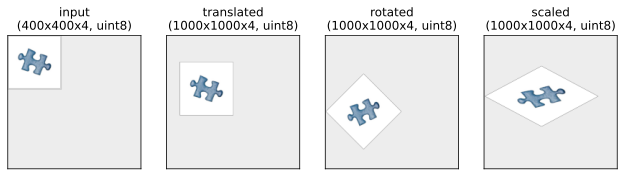

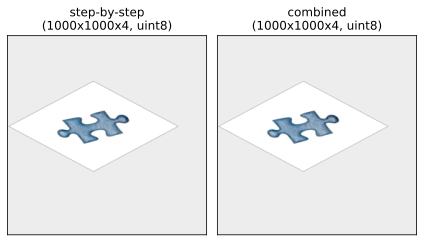

In [10]:
# Step 1: Translate the image
#############################
tx = 100  # translation in the x-axis
ty = 200  # translation in the y-axis
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv.warpAffine(imageB, translation_matrix, (1000, 1000))

# Step 2: Rotate the image about center
#######################################
angle = 45  # rotation angle in degrees
height, width = translated_image.shape[:2]
center = (width // 2, height // 2)
rotation_matrix = cv.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv.warpAffine(translated_image, rotation_matrix, (width, height))

# Step 3: Scale the image
#########################
scale_x = 1.5  # scaling factor in the x-axis
scale_y = 0.8  # scaling factor in the y-axis
scaling_matrix = np.float32([[scale_x, 0, 0], [0, scale_y, 0]])
scaled_image = cv.warpAffine(rotated_image, scaling_matrix, 
                             (rotated_image.shape[1], rotated_image.shape[0]))
result1 = scaled_image

# Alternative: Combine the transformations into a single matrix
###############################################################
rotation_matrix = np.vstack((rotation_matrix, [0, 0, 1]))
translation_matrix = np.vstack((translation_matrix, [0, 0, 1]))
scaling_matrix = np.vstack((scaling_matrix, [0, 0, 1]))
combined_matrix = scaling_matrix @ rotation_matrix @ translation_matrix
combined_matrix = combined_matrix[:2, :]
result2 = cv.warpAffine(imageB, combined_matrix, (1000, 1000))

# Display the original and transformed images
isp.show_image_chain((imageB, translated_image, rotated_image, scaled_image),
                     titles=("input", "translated", "rotated", "scaled"), 
                     shape=(1000, 1000))
# Display the comparison of the two methods
isp.show_image_pair(result1, result2, title1="step-by-step", title2="combined")


---

## **Perspective transformations**

<a id='exercise6'></a>

The code below demonstrates how to apply a perspective transformation. It reproduces the example on the affine transformation primer. 

The function [`cv.getPerspectiveTransform()`](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga20f62aa3235d869c9956436c870893ae) takes two arrays that specify the colored rectangles in *physical* coordinates, not pixel coordinates: The first coordinate refers to the horizontal position, the second coordinate to the vertical position.

Using `cv.getPerspectiveTransform()`, you can map any pair of quadrilaterals, as illustrated in the second example. This makes it ideal for correcting perspective distortions or simulating viewpoint changes.


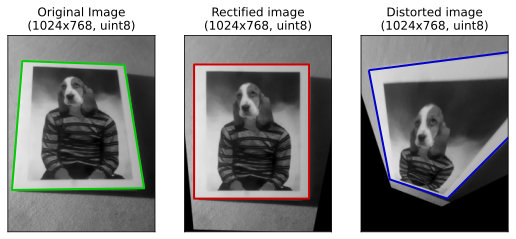

In [11]:
image = cv.imread(filename="../data/images/dog-face.jpg", 
                  flags=cv.IMREAD_GRAYSCALE)

# Rectangle coordinates
rect_in = np.array([[75, 132],
                    [607, 152],
                    [711, 796],
                    [21, 805]], dtype=np.float32)
rect_out1 = np.array([[50, 150],
                      [650, 150],
                      [650, 850],
                      [50, 850]], dtype=np.float32)
rect_out2 = np.array([[40, 180],
                      [1280, 20],
                      [450, 850],
                      [150, 750]], dtype=np.float32)

# Compute a perspective transform, example 1
matrix = cv.getPerspectiveTransform(rect_in, rect_out1)
image_new1 = cv.warpPerspective(image, matrix, (image.shape[1], image.shape[0]))

# Compute a perspective transform, example 1
matrix = cv.getPerspectiveTransform(rect_in, rect_out2)
image_new2 = cv.warpPerspective(image, matrix, (image.shape[1], image.shape[0]))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 9))
isp.show_image(image, title="Original Image", ax=ax1);
isp.show_image(image_new1, title="Rectified image", ax=ax2);
isp.show_image(image_new2, title="Distorted image", ax=ax3);
# Add patch polygons to the image
ax1.add_patch(plt.Polygon(rect_in, fill=False, edgecolor=[0,0.8,0], lw=2))
ax2.add_patch(plt.Polygon(rect_out1, fill=False, edgecolor=[0.8,0,0], lw=2))
ax3.add_patch(plt.Polygon(rect_out2, fill=False, edgecolor=[0,0,0.8], lw=2));
